# Capturando dados dos jogadores(Data Extraction)

In [124]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install lxml
!pip install numpy
!pip install selenium
!pip install matplotlib
!pip install seaborn

     ------------------------------------ 292.8/292.8 KB 548.7 kB/s eta 0:00:00
     ---------------------------------------- 34.3/34.3 MB 4.2 MB/s eta 0:00:00


In [16]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 106.0 kB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 KB 105.5 kB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import time
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Após os imports será criado uma lista com os anos que serão analisados 

In [4]:
anos = list(range(1991,2022))
anos

[1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Com a lista criada, podemos agora pegar a URL do site onde estão a lista dos jogadores juntamente com suas pontuações. A URL será utilizada para realizarmos um web-scraping dos dados, onde iremos formatar a url com um for adicionando item por item da lista **anos** 

In [10]:
url_basket = "https://www.basketball-reference.com/awards/awards_{}.html"

Através de um for, usaremos a variável url para criarmos uma url formatada com cada ano da lista **anos** inserida, logo então será criada a variável **data** para capturarmos o html da pagina e jogar o arquivo html para a pasta "MVPs", onde no final terá arquivos html para cada ano da lista, de 1991 a 2021.

In [12]:
for ano in anos:
    url = url_basket.format(ano)
    data = requests.get(url)
    
    with open("MVPs/{}.html".format(ano), "w+",encoding="utf-8") as f:
        f.write(data.text)

Com todos os html exportados, podemos agora capturar os dados da tabela de cada um para transformarmos em um CSV completo com todos os dados e concatenados, criando um vetor mvp_df, adicionaremos a ele os dados da tabela de cada ano(1991 a 2021) com a ajuda do Beautiful Soup e Pandas.

In [11]:
mvp_df = []
for ano in anos:
    with open("MVPs/{}.html".format(ano),encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr",class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp = pd.read_html(str(mvp_table))[0]
    mvp["Year"] = ano
    
    mvp_df.append(mvp)

In [15]:
mvps_df = pd.concat(mvp_df)
mvps_df.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [16]:
mvps_df.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021
14,13T,Kawhi Leonard,29,LAC,0.0,1.0,1010,0.001,52,34.1,...,6.5,5.2,1.6,0.4,0.512,0.398,0.885,8.8,0.238,2021


In [17]:
mvps_df.to_csv("mvps.csv")

O processo abaixo é o mesmo que a forma de extração anterior, no entanto, um problema é identificado, a página usada para o web scraping usa de javascript para a renderização de seus dados, onde são carregados conforme nos movemos pela pagina, oque torna impossível o scraping feito anteriormente, logo, usaremos selenium e indicaremos a ele para realizar um "scroll" para baixo, fazendo com que a pagina carregue os dados por inteiro possibilitando a exportação do html da forma correta.

In [25]:
driver = webdriver.Chrome(executable_path="D:/Driver/chromedriver")

C:\Users\hlibe\AppData\Local\Temp\ipykernel_3804\399709993.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="D:/Driver/chromedriver")


In [28]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

for ano in anos:
    url = player_stats_url.format(ano)
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    html = driver.page_source
    with open("Players/{}.html".format(ano),"w+",encoding="utf-8") as f:
        f.write(html)

In [32]:
player_df = []
for ano in anos:
    with open("Players/{}.html".format(ano), encoding="utf-8") as f:
        page = f.read()
        
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr",class_="thead").decompose()
    player_table = soup.find(id="per_game_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = ano
    player_df.append(player)

In [34]:
players_df = pd.concat(player_df)
players_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [35]:
players_df.to_csv("players.csv")

Agora em busca dos times de basquete, utilizaremos o mesmo processo de scraping, não necessitando do selenium pois a página não usa de javascript para carregar as informações da tabela.

In [36]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [38]:
for ano in anos:
    url = team_stats_url.format(ano)
    data = requests.get(url)
    with open("Teams/{}.html".format(ano),"w+",encoding="utf-8") as f:
        f.write(data.text)

In [42]:
team_df = []
for ano in anos:
    with open("Teams/{}.html".format(ano), encoding="utf-8") as f:
        page = f.read()
        
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr",class_="thead").decompose()
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = ano
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"]
    team_df.append(team)
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find("tr",class_="thead").decompose()
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = ano
    team["Team"] = team["Western Conference"]
    del team["Western Conference"]
    team_df.append(team)
    
    

In [43]:
teams_df = pd.concat(team_df)
teams_df

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [44]:
teams_df.to_csv("teams.csv")

# Data Cleaning

In [4]:
mvps = pd.read_csv("mvps.csv")
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [5]:
mvps = mvps[["Player","Year","Pts Won","Pts Max","Share"]]

In [8]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


In [11]:
players = pd.read_csv("Players.csv")
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18040,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18041,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [12]:
del players["Unnamed: 0"]

In [13]:
del players["Rk"]

In [15]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [16]:
players["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babić
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


In [18]:
players["Player"] = players["Player"].str.replace("*","",regex=False)

In [63]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995


In [20]:
players.groupby(["Player","Year"]).get_group(("Greg Anderson",1991))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [21]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] == df.iloc[-1,:]["Tm"]
        return row
players = players.groupby(["Player","Year"]).apply(single_row)

In [22]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                              
A.C. Green    1991 164       A.C. Green  PF  27  LAL  82  21  26.4  3.1   6.6   
              1992 633       A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 1092      A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 1579      A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 2067      A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 2563      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 3138      A.C. Green  PF  33  TOT  83  73  30.0  2.8   5.8   
              1998 3725      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 4283      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 4811      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 5330      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 4684   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1991 127     A.J. English  SG  23  WSB  70  12  20.6  3.6   8.2   
              1992 597     A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Guyton   2001 5333     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 5886     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 6393     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 14814   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Price    2010 10727     A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 11356     A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1991 164    .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 633    .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 1092   .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 1579   .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 2067   .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 2563   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 3138   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 3725   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 4283   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 4811   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 5330   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 4684   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1991 127    .439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 597    .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Guyton   2001 5333   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 5886   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 6393   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 14814  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Price    2010 10727  .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 11356  .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   

                           PTS  Year  
Player        Year                    
A.C. Green    1991 164     9.1  1991  
              1992 633    13.6  1992  
              1993 1092   12.8  1993  
              1994 1579   14.7  1994  
              1995 2067   11.2  1995  
              1996 2563    7.5  1996  
              1997 3138    7.2  1997  
              1998 3725    7.3  1998  
              1999 4283    4.9  1999  
              2000 4811    5.0  2000  
              2001 5330    4.5  2001  
A.J.

In [24]:
players.index = players.index.droplevel()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
6595,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
7176,Željko Rebrača,C,31,TOT,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
7776,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [28]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1412,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1911,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2381,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [30]:
combined_dfs = players.merge(mvps, how="outer", on=["Player","Year"])
combined_dfs

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14089,Željko Rebrača,C,31,TOT,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [31]:
combined_dfs[combined_dfs["Pts Won"]>0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
187,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
332,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,Vince Carter,SF-SG,28,TOT,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [35]:
combined_dfs[["Pts Won","Pts Max","Share"]] = combined_dfs[["Pts Won","Pts Max","Share"]].fillna(0)

In [37]:
combined_dfs[combined_dfs["Pts Won"]==0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14089,Željko Rebrača,C,31,TOT,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [38]:
combined_dfs

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14089,Željko Rebrača,C,31,TOT,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [40]:
teams = pd.read_csv("teams.csv")
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1028,13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
1029,14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
1030,15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [41]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [64]:
teams = teams[~teams["W"].str.contains("Division")].copy()
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks
10,10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks


In [65]:
teams["Team"] = teams["Team"].str.replace("*","",regex=False)

In [67]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [68]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [48]:
combined_dfs["Tm"].unique()

array(['LAL', 'PHO', 'TOT', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW',
       'IND', 'WAS', 'MIN', 'BOS', 'HOU', 'ORL', 'NOH', 'TOR', 'CHO',
       'POR', 'PHI', 'UTA', 'MIL', 'SEA', 'NJN', 'LAC', 'OKC', 'ATL',
       'CHA', 'DEN', 'NYK', 'NOP', 'BRK', 'DET', 'SAS', 'MEM', 'CHH',
       'SAC', 'VAN', 'NOK'], dtype=object)

In [69]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name
        

In [70]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [71]:
combined_dfs["Team"] = combined_dfs["Tm"].map(nicknames)

In [72]:
combined_dfs

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14089,Željko Rebrača,C,31,TOT,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,NaN
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [73]:
status = combined_dfs.merge(teams, how="outer", on=["Team","Year"])
status

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Jordan McLaughlin,PG,23,MIN,30,2,19.7,2.9,5.9,.489,...,0.0,Minnesota Timberwolves,5.0,19,45,.297,22.5,113.3,117.5,-4.02
14088,Josh Okogie,SG,21,MIN,62,28,25.0,2.7,6.4,.427,...,0.0,Minnesota Timberwolves,5.0,19,45,.297,22.5,113.3,117.5,-4.02
14089,Karl-Anthony Towns,C,24,MIN,35,35,33.9,9.0,17.8,.508,...,0.0,Minnesota Timberwolves,5.0,19,45,.297,22.5,113.3,117.5,-4.02
14090,Kelan Martin,SF,24,MIN,31,4,16.0,2.3,5.8,.392,...,0.0,Minnesota Timberwolves,5.0,19,45,.297,22.5,113.3,117.5,-4.02


In [75]:
del status["Unnamed: 0"]

In [76]:
status.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [77]:
status = status.apply(pd.to_numeric, errors="ignore")

In [93]:
status.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [82]:
status["GB"].unique()

array([ 5. , 14. , 23. ,  7. ,  0. ,  nan, 42. , 18. ,  6. , 24. , 26. ,
       37. , 29. , 21. , 28. , 25. ,  8. , 19. ,  1. , 13. ,  3. , 15. ,
        9. ,  2. , 35. , 20. , 11. , 16. , 41. , 12. , 10. , 30. , 34. ,
        4. ,  1.5, 22. , 51. , 39. , 18.5, 48. , 40. , 17. , 46. , 10.5,
       32. , 38. , 27. , 31. , 33. , 50. , 43. , 45. , 25.5, 36. ,  3.5,
       20.5, 11.5, 44. , 52. , 56. ,  2.5, 12.5, 32.5, 21.5,  4.5, 47. ,
       22.5])

In [91]:
status["GB"] = pd.to_numeric(status["GB"])

In [94]:
status["GB"] = pd.to_numeric(status["GB"].str.replace("—","0"))

AttributeError: Can only use .str accessor with string values!

In [85]:
status["GB"] = status["GB"].fillna(0)

In [95]:
status["GB"].unique()

array([ 5. , 14. , 23. ,  7. ,  0. , 42. , 18. ,  6. , 24. , 26. , 37. ,
       29. , 21. , 28. , 25. ,  8. , 19. ,  1. , 13. ,  3. , 15. ,  9. ,
        2. , 35. , 20. , 11. , 16. , 41. , 12. , 10. , 30. , 34. ,  4. ,
        1.5, 22. , 51. , 39. , 18.5, 48. , 40. , 17. , 46. , 10.5, 32. ,
       38. , 27. , 31. , 33. , 50. , 43. , 45. , 25.5, 36. ,  3.5, 20.5,
       11.5, 44. , 52. , 56. ,  2.5, 12.5, 32.5, 21.5,  4.5, 47. , 22.5])

In [87]:
status.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [99]:
status["L"] = status["L"].fillna(0)

In [100]:
status["W"] = status["W"].fillna(0)

In [104]:
status["L"]= status["L"].astype('int64')

In [105]:
status["W"] = status["W"].astype('int64')

In [106]:
status.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [107]:
status.to_csv("player_mvp_stats.csv")

In [109]:
maior_score = status[status["G"]>70].sort_values("PTS",ascending=False).head(10)

<AxesSubplot:xlabel='Player'>

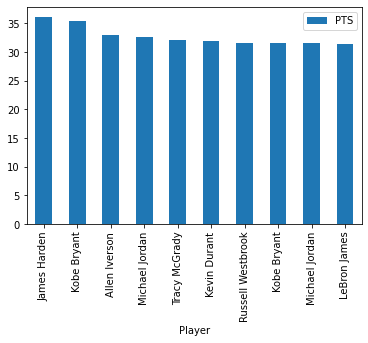

In [115]:
maior_score.plot.bar("Player","PTS")

In [119]:
maior_score = status.groupby("Year").apply(lambda x: x.sort_values("PTS",ascending=False).head(1))

<AxesSubplot:xlabel='Year'>

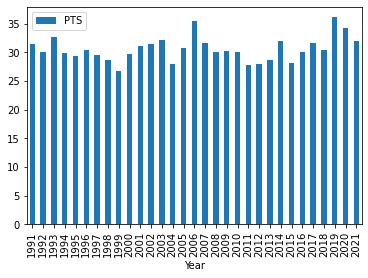

In [120]:
maior_score.plot.bar("Year","PTS")

In [137]:
status.corr()["Share"]

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.065789
3P         0.096225
3PA        0.096460
3P%        0.013611
2P         0.275976
2PA        0.251885
2P%        0.063240
eFG%       0.059335
FT         0.316392
FTA        0.321457
FT%        0.037875
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071046
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.113587
L         -0.062926
W/L%       0.131785
GB        -0.085371
PS/G       0.048058
PA/G      -0.040404
SRS        0.127688
Name: Share, dtype: float64

<AxesSubplot:>

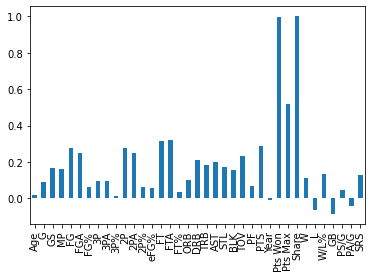

In [139]:
status.corr()["Share"].plot.bar()

# Machine Learning

In [3]:
stats = pd.read_csv("player_mvp_stats.csv")

In [4]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,Jordan McLaughlin,PG,23,MIN,30,2,19.7,2.9,5.9,...,0.0,0.0,Minnesota Timberwolves,19,45,0.297,22.5,113.3,117.5,-4.02
14088,14088,Josh Okogie,SG,21,MIN,62,28,25.0,2.7,6.4,...,0.0,0.0,Minnesota Timberwolves,19,45,0.297,22.5,113.3,117.5,-4.02
14089,14089,Karl-Anthony Towns,C,24,MIN,35,35,33.9,9.0,17.8,...,0.0,0.0,Minnesota Timberwolves,19,45,0.297,22.5,113.3,117.5,-4.02
14090,14090,Kelan Martin,SF,24,MIN,31,4,16.0,2.3,5.8,...,0.0,0.0,Minnesota Timberwolves,19,45,0.297,22.5,113.3,117.5,-4.02


In [5]:
del stats["Unnamed: 0"]

In [6]:
pd.isnull(stats).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team       1586
W             0
L             0
W/L%       1586
GB            0
PS/G       1586
PA/G       1586
SRS        1586
dtype: int64

In [7]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]].head()

,Player,3PA
2,Elden Campbell,0.0
3,Irving Thomas,0.0
17,Jack Haley,0.0
19,Keith Owens,0.0
32,James Edwards,0.0


In [9]:
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]].head()

,Player,FTA
74,John Coker,0.0
109,Jason Sasser,0.0
121,Matt Fish,0.0
145,Adrian Caldwell,0.0
159,Bruno Šundov,0.0


In [10]:
stats = stats.fillna(0)

In [11]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [12]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS']

In [13]:
train = stats[stats["Year"]<2021]

In [14]:
test = stats[stats["Year"] == 2021]

In [18]:
reg = Ridge(alpha=.1)

In [21]:
reg.fit(train[predictors],train["Share"])

Ridge(alpha=0.1)

In [23]:
predictions = reg.predict(test[predictors])

In [28]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [29]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [30]:
combination.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
11230,Nikola Jokić,0.961,0.154980
8467,Joel Embiid,0.580,0.165279
3913,Stephen Curry,0.449,0.141428
9716,Giannis Antetokounmpo,0.345,0.205642
1723,Chris Paul,0.138,0.076584
10854,Luka Dončić,0.042,0.149250
7427,Damian Lillard,0.038,0.117480
3807,Julius Randle,0.020,0.089455
871,Derrick Rose,0.010,0.038516
11206,Rudy Gobert,0.008,0.096498


In [33]:
mean_squared_error(combination["Share"], combination["predictions"])

0.002678520889202911

In [34]:
combination["Share"].value_counts()

0.000    525
0.001      3
0.010      1
0.138      1
0.020      1
0.449      1
0.038      1
0.005      1
0.003      1
0.580      1
0.345      1
0.042      1
0.008      1
0.961      1
Name: Share, dtype: int64

In [36]:
actual = combination.sort_values("Share", ascending=False)

In [38]:
predicted = combination.sort_values("predictions", ascending=False)
actual["Rk"] = list(range(1,actual.shape[0]+1))

In [39]:
predicted["Predicted_Rk"] = list(range(1, predicted.shape[0]+1))

In [40]:
actual.merge(predicted, on = "Player").head(5)

,Player,Share_x,predictions_x,Rk,Share_y,predictions_y,Predicted_Rk
0,Nikola Jokić,0.961,0.154980,1,0.961,0.154980,3
1,Joel Embiid,0.580,0.165279,2,0.580,0.165279,2
2,Stephen Curry,0.449,0.141428,3,0.449,0.141428,8
3,Giannis Antetokounmpo,0.345,0.205642,4,0.345,0.205642,1
4,Chris Paul,0.138,0.076584,5,0.138,0.076584,33


In [42]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [43]:
find_ap(combination)

0.7303030303030302

In [44]:
anos = list(range(1991,2022))

In [46]:
aps = []
all_predictions = []
for ano in anos[5:]:
    train = stats[stats["Year"] < ano]
    test = stats[stats["Year"] == ano]
    reg.fit(train[predictors],train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [47]:
sum(aps)/len(aps)

0.71203594068725

In [48]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

In [49]:
add_ranks(all_predictions[1])

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1888,Karl Malone,0.857,0.192732,2,1,-1
10361,Michael Jordan,0.832,0.168520,3,2,-1
13938,Grant Hill,0.327,0.130331,6,3,-3
4763,Tim Hardaway,0.207,0.061157,20,4,-16
8152,Glen Rice,0.117,0.033534,51,5,-46
...,...,...,...,...,...,...
9932,Ben Davis,0.000,0.009384,156,437,281
8792,Jalen Rose,0.000,0.009580,155,438,283
3851,Marcus Brown,0.000,0.009580,154,439,285
9935,Horacio Llamas,0.000,0.009874,153,440,287


In [60]:
def backtest(stats, model, anos, predictors):
    aps = []
    all_predictions = []
    for ano in anos:
        train = stats[stats["Year"] < ano]
        test = stats[stats["Year"] == ano]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [61]:
mean_ap, aps, all_predictions = backtest(stats, reg, anos[5:], predictors)

In [62]:
mean_ap

0.71203594068725

In [63]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1489,Jason Kidd,0.712,0.026692,54,2,-52
5222,Steve Nash,0.839,0.033061,46,1,-45
5237,Steve Nash,0.739,0.050689,36,1,-35
12513,Joakim Noah,0.258,0.047113,38,4,-34
8373,Peja Stojaković,0.228,0.035828,36,4,-32
5251,Steve Nash,0.785,0.070340,22,2,-20
4763,Tim Hardaway,0.207,0.061157,20,4,-16
1427,Gary Payton,0.372,0.076484,13,3,-10
1246,Allen Iverson,0.270,0.039225,14,4,-10
5292,Carmelo Anthony,0.393,0.082949,12,3,-9


In [64]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
28,0.144117,W/L%
13,0.061470,eFG%
18,0.034755,DRB
17,0.022245,ORB
10,0.015013,2P
21,0.012019,STL
15,0.011563,FTA
22,0.011173,BLK
20,0.007313,AST
25,0.006167,PTS


In [66]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [68]:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [69]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.707,5.0,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.707,5.0,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.707,5.0,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.707,5.0,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.707,5.0,106.3,99.6,6.73,2.383005,1.636110,1.784950,0.897959,1.525760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Jordan McLaughlin,PG,23,MIN,30,2,19.7,2.9,5.9,0.489,...,0.297,22.5,113.3,117.5,-4.02,0.870914,2.183373,1.768693,0.250592,1.062036
14088,Josh Okogie,SG,21,MIN,62,28,25.0,2.7,6.4,0.427,...,0.297,22.5,113.3,117.5,-4.02,0.985508,0.831761,1.768693,1.002369,0.743425
14089,Karl-Anthony Towns,C,24,MIN,35,35,33.9,9.0,17.8,0.508,...,0.297,22.5,113.3,117.5,-4.02,3.036739,2.287343,1.447112,3.007106,3.504718
14090,Kelan Martin,SF,24,MIN,31,4,16.0,2.3,5.8,0.392,...,0.297,22.5,113.3,117.5,-4.02,0.733401,0.363895,0.321581,0.751776,0.849629


In [71]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [72]:
mean_ap, aps, all_predictions = backtest(stats, reg, anos[5:], predictors)

In [73]:
mean_ap

0.7142309866673262

In [74]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [77]:
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(stats, rf, anos[28:], predictors + ["NPos", "NTm"])

In [78]:
mean_ap

0.7829774561481879

In [80]:
mean_ap, aps, all_predictions = backtest(stats, reg, anos[28:], predictors)
mean_ap

0.7902453102453103